### Lab 0: Fundamentals Of Signal Processing

1. 
Unit Step function

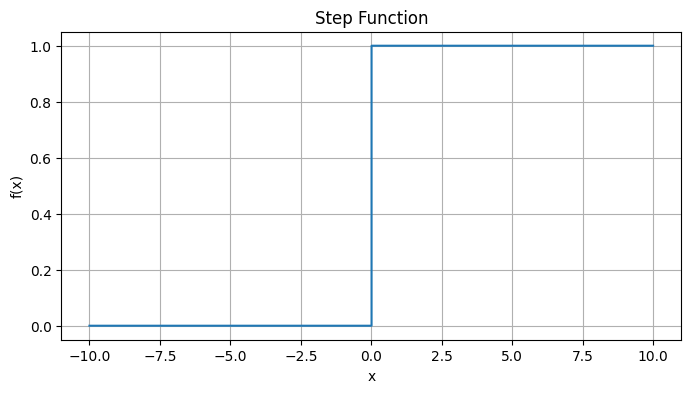

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an array of x values
x = np.linspace(-10, 10, 1000)

# Compute the step function values
y = np.heaviside(x,0.5)

# Plot the step function
plt.figure(figsize=(8, 4))
plt.step(x, y, where='post')  # 'where' specifies where the step occurs
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


A unit impulse function

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\204345085.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, impulse, basefmt=" ", use_line_collection=True)


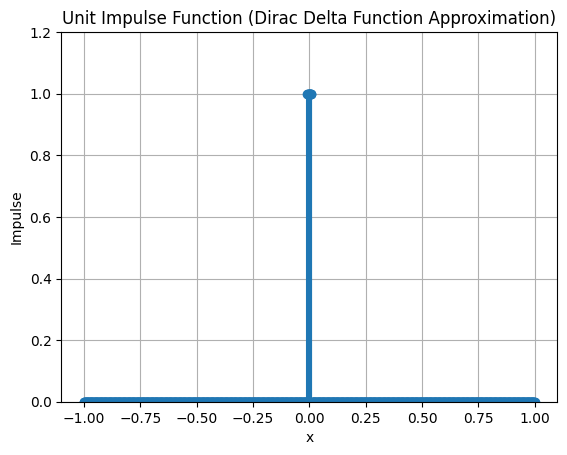

In [56]:
# Parameters for the impulse function
impulse_position = 0  # Position where the impulse occurs
impulse_magnitude = 1  # Magnitude of the impulse (can be considered as infinity in theory)

# Define the range for x
x = np.linspace(-1, 1, 1000)

# Create the impulse function
# Approximate the impulse function with a high value at one point
impulse = np.zeros_like(x)
impulse[np.abs(x - impulse_position) < 0.01] = impulse_magnitude

# Plot the impulse function
plt.stem(x, impulse, basefmt=" ", use_line_collection=True)
plt.title('Unit Impulse Function (Dirac Delta Function Approximation)')
plt.xlabel('x')
plt.ylabel('Impulse')
plt.ylim(0, 1.2 * impulse_magnitude)
plt.grid()
plt.show()


Ramp Function

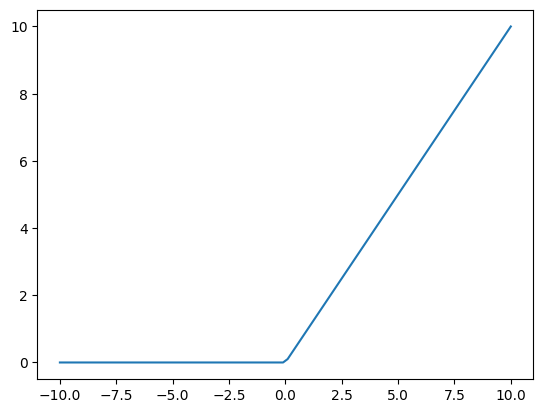

In [57]:
def ramp(a):
    return np.maximum(a,0)
    
x = np.linspace(-10,10,100)
y = ramp(x)

plt.plot(x,y)
plt.show()

An exponential signal (growth)

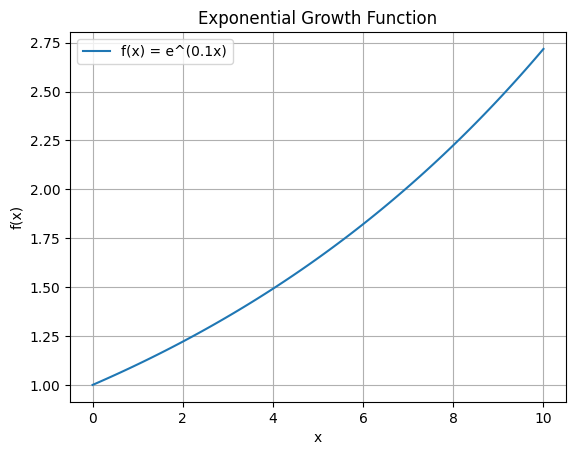

In [58]:
x = np.linspace(0, 10, 100)  # Generate 100 values for x from 0 to 10
y = np.exp(0.1 * x)          # Calculate the corresponding y values

plt.figure()
plt.plot(x, y, label='f(x) = e^(0.1x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exponential Growth Function')
plt.legend()
plt.grid(True)
plt.show()


An exponential signal (decaying)

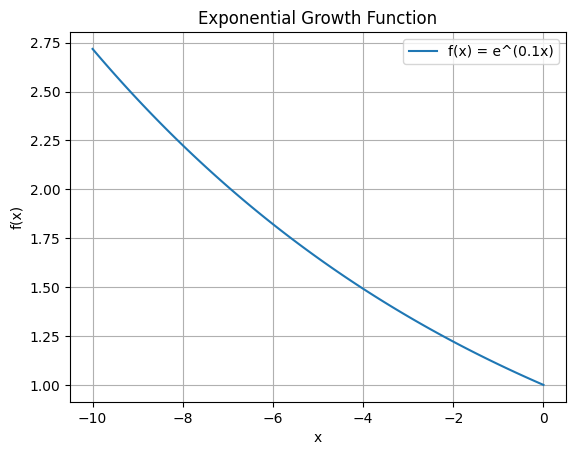

In [59]:
x = np.linspace(0, -10, 100)  # Generate 100 values for x from 0 to 10
y = np.exp(-0.1 * x)          # Calculate the corresponding y values

plt.figure()
plt.plot(x, y, label='f(x) = e^(0.1x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exponential Growth Function')
plt.legend()
plt.grid(True)
plt.show()


A sinusoidal signal.

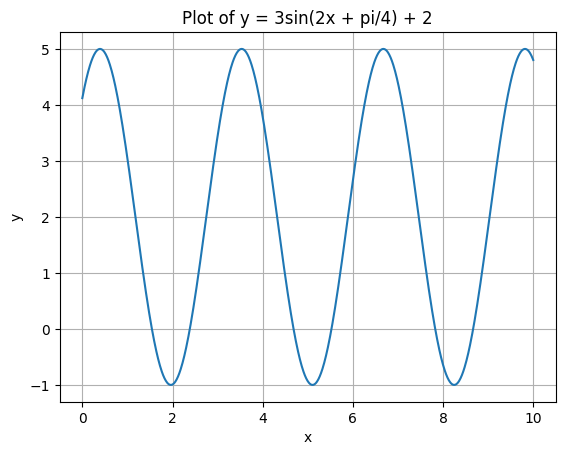

In [60]:
x = np.linspace(0, 10, 1000)
y = 3 * np.sin(2*x + np.pi/4) + 2

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = 3sin(2x + pi/4) + 2')
plt.grid(True)
plt.show()

2. Visualize the effects of sampling and reconstruction of a continuous time signal
 - Generate a continuous sinusoidal signal

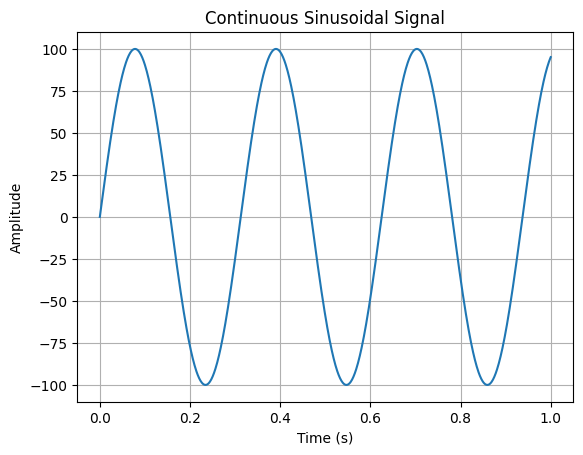

In [61]:
A = 100  # Amplitude
f = 3.2  # Frequency in Hz
phi = 0  # Phase angle
t = np.linspace(0, 1, 1000)  # Time from 0 to 1 second

# Generating the sinusoidal signal
x = A * np.sin(2 * np.pi * f * t + phi)

# Plotting the generated signal
plt.plot(t, x)
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### Nyquist Rate
The theoretrical minimum sampling rate at which a signal can be sampled and still can be reconstructed from its samples without any distortion is called Nyquist rate of sampling

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\2226125584.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t_nyquist, sampled_x_nyquist, use_line_collection=True)


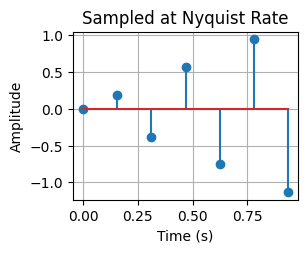

In [62]:

# Sampling the signal at the Nyquist rate
nyquist_rate = 2 * f
nyquist_samples = int(1 / (nyquist_rate * (t[1]-t[0])))
sampled_t_nyquist = t[::nyquist_samples]
sampled_x_nyquist = x[::nyquist_samples]
plt.subplot(2, 2, 2)
plt.stem(sampled_t_nyquist, sampled_x_nyquist, use_line_collection=True)
plt.title('Sampled at Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\3790154776.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t_high, sampled_x_high, use_line_collection=True)


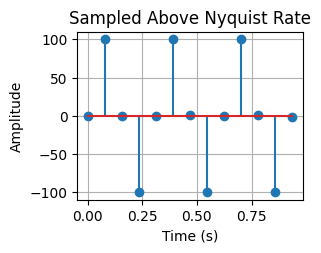

In [63]:
# Sampling the signal above the Nyquist rate
high_rate = 4 * f
high_samples = int(1 / (high_rate * (t[1]-t[0])))
sampled_t_high = t[::high_samples]
sampled_x_high = x[::high_samples]
plt.subplot(2,2,3)
plt.stem(sampled_t_high, sampled_x_high, use_line_collection=True)
plt.title('Sampled Above Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\3110066955.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t_low, sampled_x_low, use_line_collection=True)


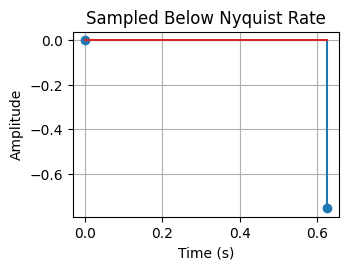

In [64]:
# Sampling the signal below the Nyquist rate
low_rate = f / 2
low_samples = int(1 / (low_rate * (t[1]-t[0])))
sampled_t_low = t[::low_samples]
sampled_x_low = x[::low_samples]
plt.subplot(2,2,4)
plt.stem(sampled_t_low, sampled_x_low, use_line_collection=True)
plt.title('Sampled Below Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Reconstruction

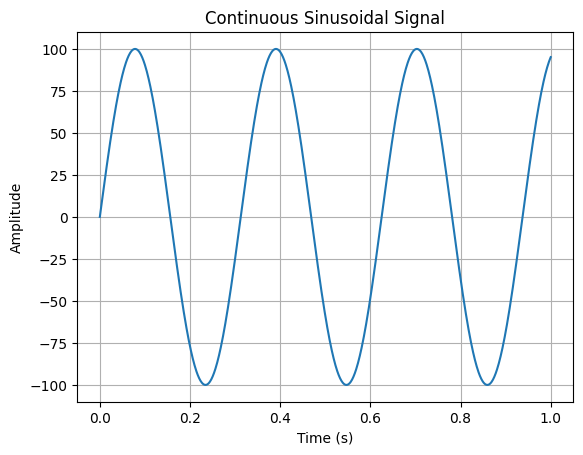

In [65]:
A = 100  # Amplitude
f = 3.2  # Frequency in Hz
phi = 0  # Phase angle
t = np.linspace(0, 1, 1000)  # Time from 0 to 1 second

# Generating the sinusoidal signal
x = A * np.sin(2 * np.pi * f * t + phi)

# Plotting the generated signal
plt.plot(t, x)
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### Nyquist Rate
The theoretrical minimum sampling rate at which a signal can be sampled and still can be reconstructed from its samples without any distortion is called Nyquist rate of sampling

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\2226125584.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t_nyquist, sampled_x_nyquist, use_line_collection=True)


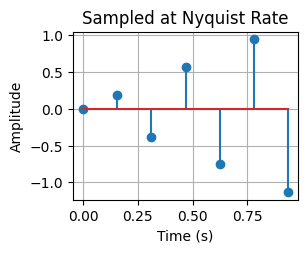

In [66]:

# Sampling the signal at the Nyquist rate
nyquist_rate = 2 * f
nyquist_samples = int(1 / (nyquist_rate * (t[1]-t[0])))
sampled_t_nyquist = t[::nyquist_samples]
sampled_x_nyquist = x[::nyquist_samples]
plt.subplot(2, 2, 2)
plt.stem(sampled_t_nyquist, sampled_x_nyquist, use_line_collection=True)
plt.title('Sampled at Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\3790154776.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t_high, sampled_x_high, use_line_collection=True)


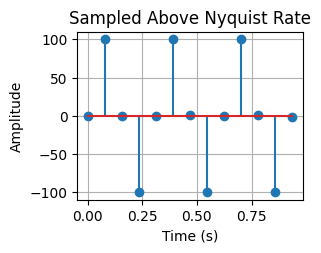

In [67]:
# Sampling the signal above the Nyquist rate
high_rate = 4 * f
high_samples = int(1 / (high_rate * (t[1]-t[0])))
sampled_t_high = t[::high_samples]
sampled_x_high = x[::high_samples]
plt.subplot(2,2,3)
plt.stem(sampled_t_high, sampled_x_high, use_line_collection=True)
plt.title('Sampled Above Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\3110066955.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sampled_t_low, sampled_x_low, use_line_collection=True)


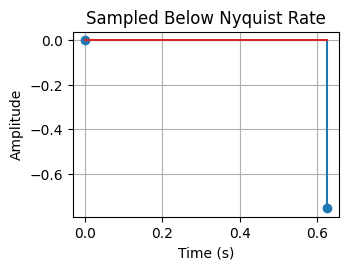

In [68]:
# Sampling the signal below the Nyquist rate
low_rate = f / 2
low_samples = int(1 / (low_rate * (t[1]-t[0])))
sampled_t_low = t[::low_samples]
sampled_x_low = x[::low_samples]
plt.subplot(2,2,4)
plt.stem(sampled_t_low, sampled_x_low, use_line_collection=True)
plt.title('Sampled Below Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

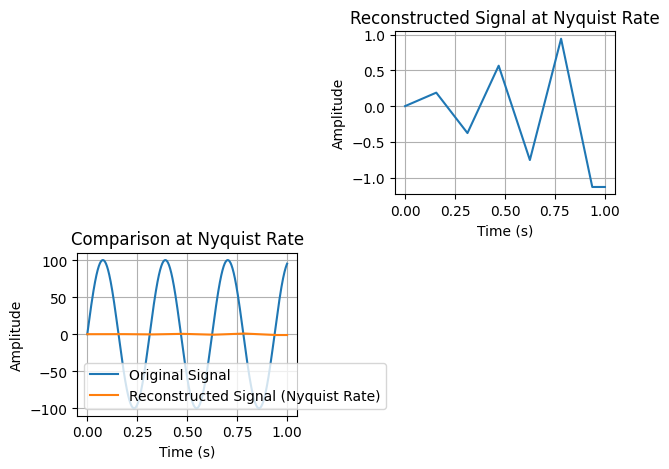

In [69]:
# Reconstruction of the sampled signal
reconstructed_signal_nyquist = np.interp(t, sampled_t_nyquist, sampled_x_nyquist)

# Plot the reconstructed signal at Nyquist rate
plt.subplot(2, 2, 2)
plt.plot(t, reconstructed_signal_nyquist)
plt.title('Reconstructed Signal at Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Compare the original signal with the reconstructed signal at Nyquist rate
plt.subplot(2, 2, 3)
plt.plot(t, x, label='Original Signal')
plt.plot(t, reconstructed_signal_nyquist, label='Reconstructed Signal (Nyquist Rate)')
plt.title('Comparison at Nyquist Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Repeat the above steps for sampling above Nyquist rate and below Nyquist rate

# Display the plots
plt.tight_layout()
plt.show()

3. 

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\1775085526.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_discrete, x_discrete, use_line_collection=True)


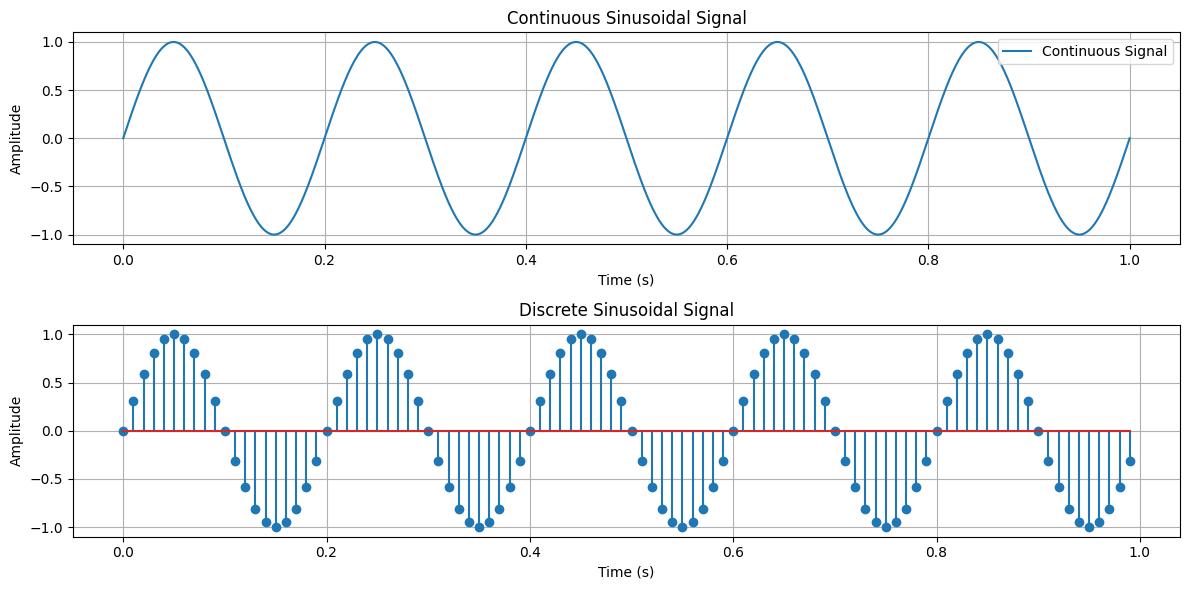

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A = 1  # Amplitude
f = 5  # Frequency in Hz
duration = 1  # Duration in seconds

# Continuous signal
t_continuous = np.linspace(0, duration, 1000)  # Time vector for continuous signal
x_continuous = A * np.sin(2 * np.pi * f * t_continuous)  # Continuous sinusoidal signal

# Discrete signal
sampling_rate = 100  # Sample rate in Hz
num_samples = int(duration * sampling_rate)  # Total number of samples
t_discrete = np.linspace(0, duration, num_samples, endpoint=False)  # Time vector for discrete signal
x_discrete = A * np.sin(2 * np.pi * f * t_discrete)  # Discrete sinusoidal signal

# Plot continuous signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuous, x_continuous, label='Continuous Signal')
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot discrete signal
plt.subplot(2, 1, 2)
plt.stem(t_discrete, x_discrete, use_line_collection=True)
plt.title('Discrete Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


4. Demonstration of the effects of time shifting and time scaling

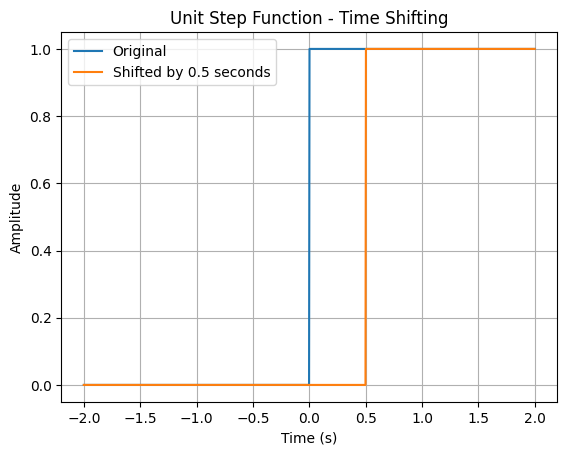

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the unit step function
t = np.linspace(-2, 2, 1000)
u = np.heaviside(t, 1)

# Shifting the unit step function
delay = 0.5  # Delay by 0.5 seconds
shifted_u = np.heaviside(t - delay, 1)

# Plotting the original and shifted unit step functions
plt.plot(t, u, label='Original')
plt.plot(t, shifted_u, label=f'Shifted by {delay} seconds')
plt.title('Unit Step Function - Time Shifting')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



Time Scaling

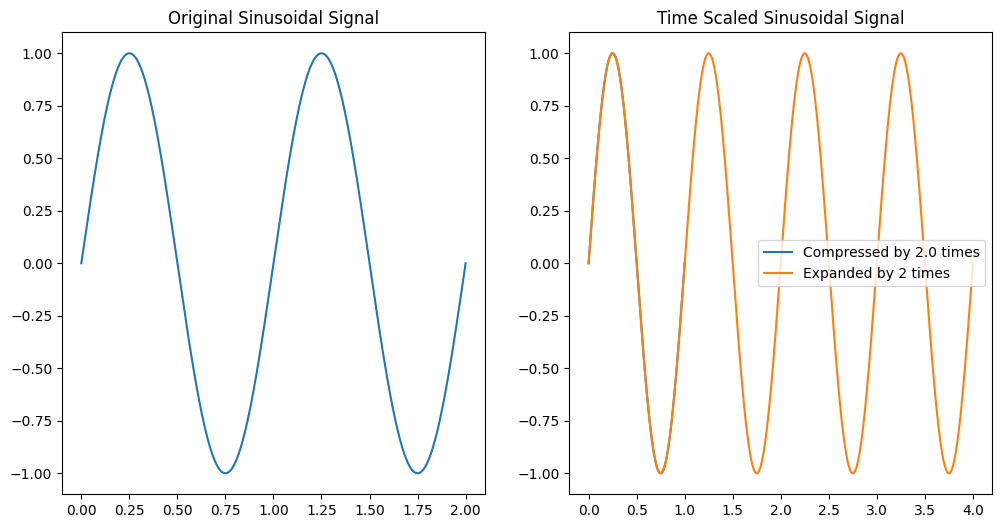

In [72]:
#Generating the original sinusoidal signal
t_original = np.linspace(0, 2, 1000)
x_original = np.sin(2 * np.pi * t_original)

# Time scaling parameters
a = 0.5  # Compression factor
b = 2  # Expansion factor

# Performing time scaling
t_compressed = a * t_original
x_compressed = np.sin(2 * np.pi * t_compressed)

t_expanded = b * t_original
x_expanded = np.sin(2 * np.pi * t_expanded)

# Plotting the original and scaled sinusoidal signals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_original, x_original, label='Original Signal')
plt.title('Original Sinusoidal Signal')

plt.subplot(1, 2, 2)
plt.plot(t_compressed, x_compressed, label=f'Compressed by {1/a} times')
plt.plot(t_expanded, x_expanded, label=f'Expanded by {b} times')
plt.title('Time Scaled Sinusoidal Signal')

plt.legend()
plt.show()

5. 

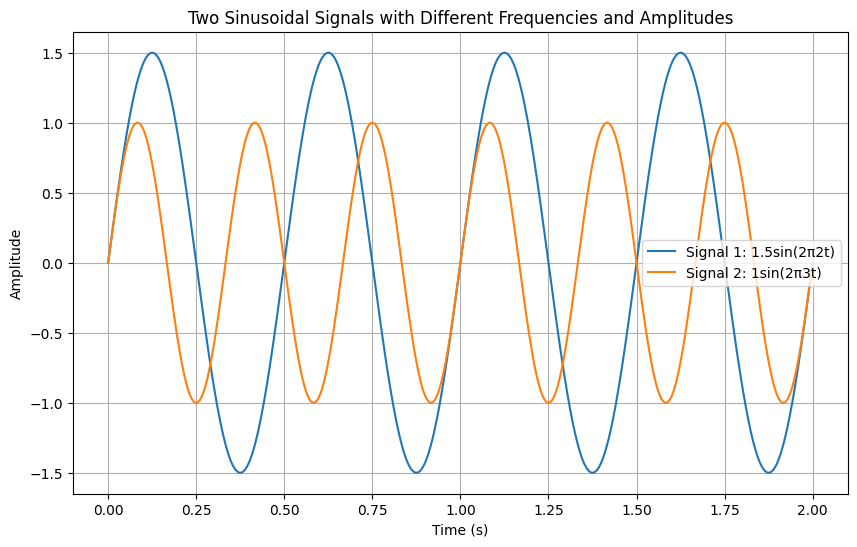

In [73]:
# Parameters for the first sinusoidal signal
A1 = 1.5  # Amplitude
f1 = 2    # Frequency in Hz
t = np.linspace(0, 2, 1000)  # Time

# Generating the first sinusoidal signal
x1 = A1 * np.sin(2 * np.pi * f1 * t)

# Parameters for the second sinusoidal signal
A2 = 1   # Amplitude
f2 = 3   # Frequency in Hz

# Generating the second sinusoidal signal
x2 = A2 * np.sin(2 * np.pi * f2 * t)

# Plotting the two sinusoidal signals
plt.figure(figsize=(10, 6))
plt.plot(t, x1, label=f'Signal 1: {A1}sin(2π{f1}t)')
plt.plot(t, x2, label=f'Signal 2: {A2}sin(2π{f2}t)')
plt.title('Two Sinusoidal Signals with Different Frequencies and Amplitudes')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


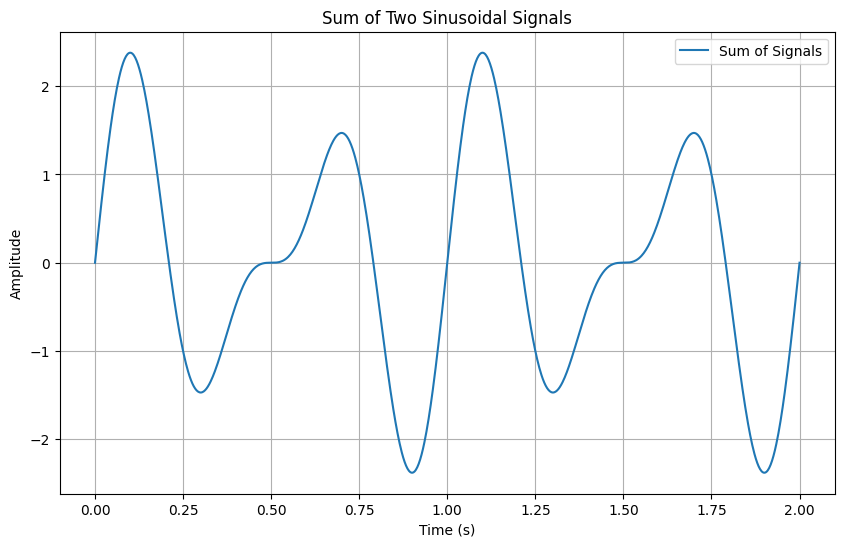

In [74]:
x_sum = x1 + x2

# Plotting the added sinusoidal signals
plt.figure(figsize=(10, 6))
plt.plot(t, x_sum, label='Sum of Signals')
plt.title('Sum of Two Sinusoidal Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

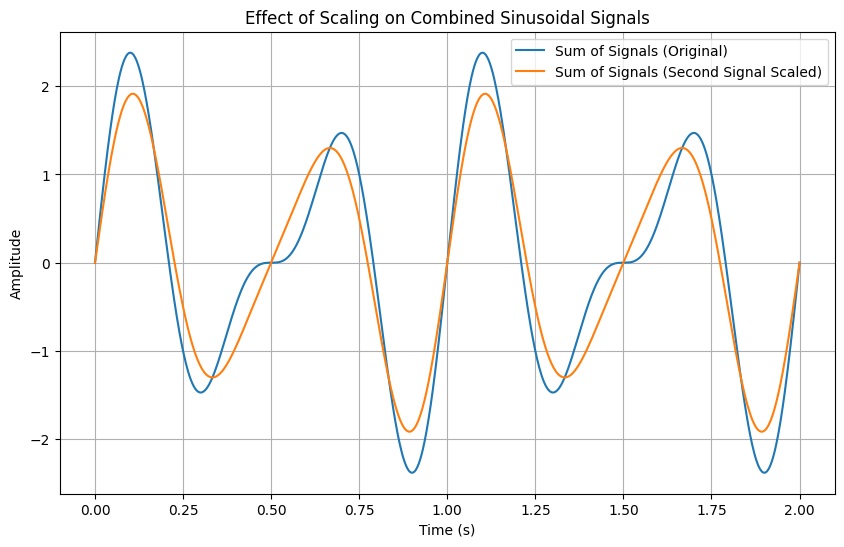

In [76]:
A2_scaled = 0.5  # Scaled amplitude

x2_scaled = A2_scaled * np.sin(2 * np.pi * f2 * t)

# Adding the scaled second signal with the first signal
x_sum_scaled = x1 + x2_scaled

# Plotting the combined signal with the scaled second signal
plt.figure(figsize=(10, 6))
plt.plot(t, x_sum, label='Sum of Signals (Original)')
plt.plot(t, x_sum_scaled, label='Sum of Signals (Second Signal Scaled)')
plt.title('Effect of Scaling on Combined Sinusoidal Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

6.

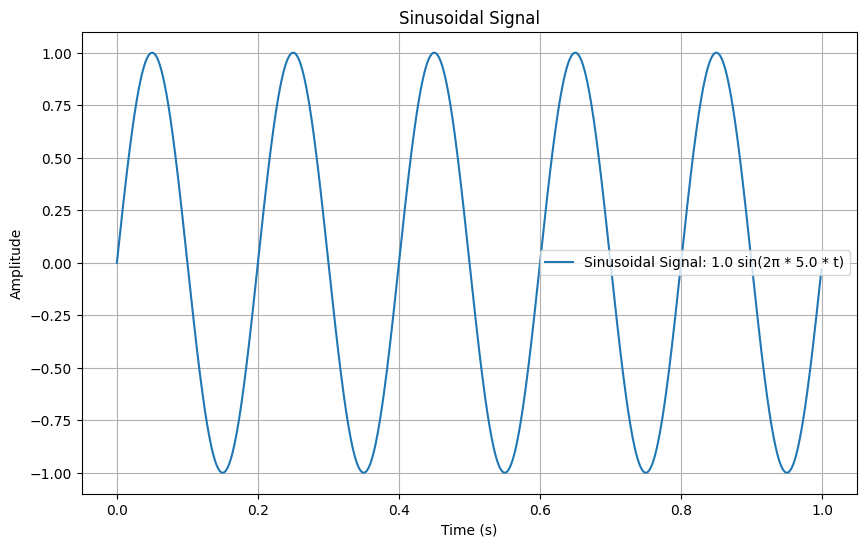

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
amplitude = 1.0
frequency = 5.0  # in Hz
duration = 1.0   # in seconds
sampling_frequency = 1000  # in Hz

# Time array
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)

# Generate the clean sinusoidal signal
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Plot the clean sinusoidal signal
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label=f'Sinusoidal Signal: {amplitude} sin(2π * {frequency} * t)')
plt.title('Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


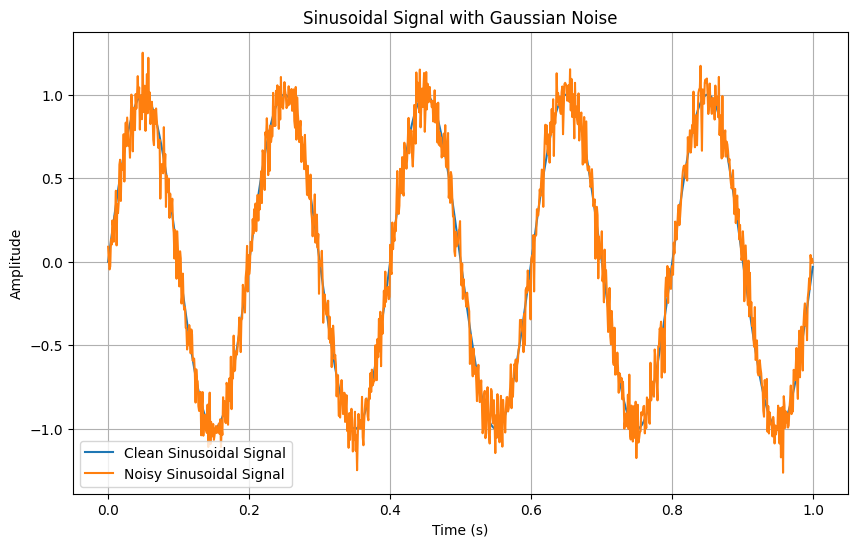

In [79]:
# Signal parameters
amplitude = 1.0
frequency = 5.0  # in Hz
duration = 1.0   # in seconds
sampling_frequency = 1000  # in Hz

# Time array
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)

# Generate the clean sinusoidal signal
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add Gaussian noise
mean = 0
std_dev = 0.1  # Standard deviation of the Gaussian noise
noise = np.random.normal(mean, std_dev, clean_signal.shape)
noisy_signal = clean_signal + noise

# Plot the clean sinusoidal signal with added noise
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Sinusoidal Signal')
plt.plot(t, noisy_signal, label='Noisy Sinusoidal Signal')
plt.title('Sinusoidal Signal with Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

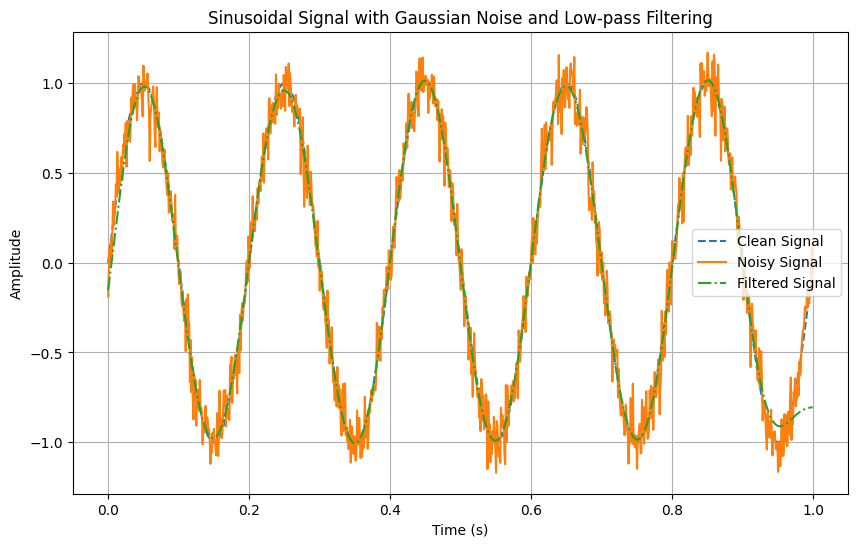

In [82]:
from scipy import signal
# Signal parameters
amplitude = 1.0
frequency = 5.0  # in Hz
duration = 1.0   # in seconds
sampling_frequency = 1000  # in Hz

# Time array
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)

# Generate the clean sinusoidal signal
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add Gaussian noise
mean = 0
std_dev = 0.1  # Standard deviation of the Gaussian noise
noise = np.random.normal(mean, std_dev, clean_signal.shape)
noisy_signal = clean_signal + noise

# Apply a low-pass filter
cutoff_frequency = 10.0  # in Hz
order = 4

# Create a low-pass Butterworth filter
b, a = signal.butter(order, cutoff_frequency / (sampling_frequency / 2), 'low')

# Apply the filter to the noisy signal
filtered_signal = signal.filtfilt(b, a, noisy_signal)

# Plot the original, noisy, and filtered sinusoidal signals
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal', linestyle='--')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', linestyle='-.')
plt.title('Sinusoidal Signal with Gaussian Noise and Low-pass Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

7.

In [83]:
# Signal parameters
amplitude1 = 1.0
frequency1 = 5.0  # in Hz
amplitude2 = 0.5
frequency2 = 10.0  # in Hz
duration = 1.0   # in seconds
sampling_frequency = 1000  # in Hz

# Time array
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)

# Generate the composite signal
signal1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t)
signal2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t)
composite_signal = signal1 + signal2

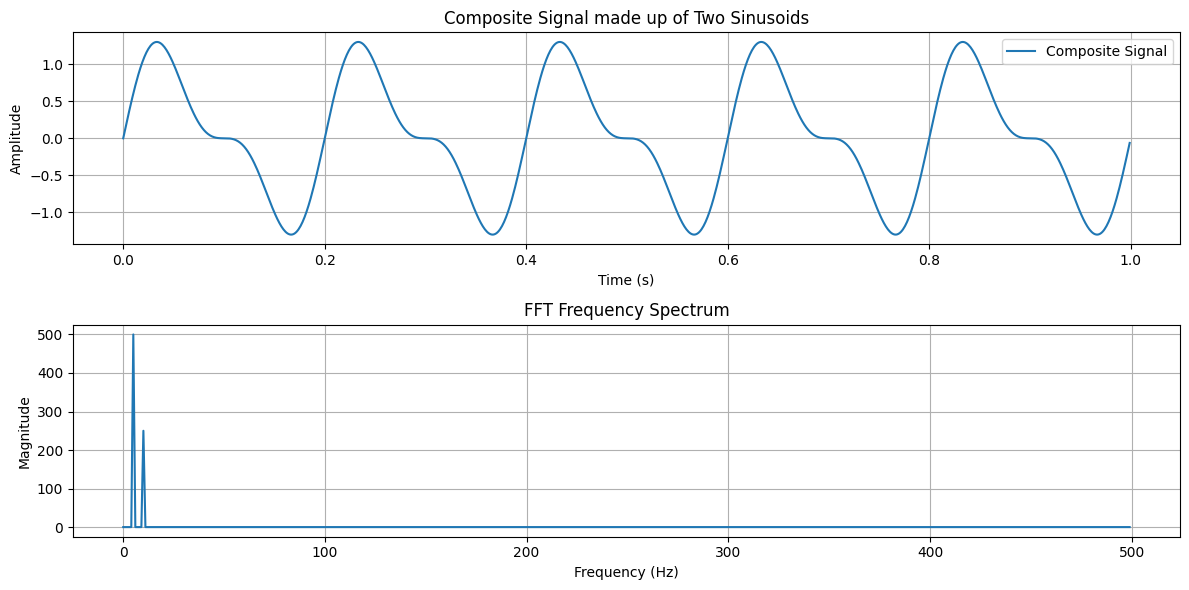

In [84]:
# Perform the Fast Fourier Transform (FFT)
fft_values = np.fft.fft(composite_signal)
frequencies = np.fft.fftfreq(len(fft_values), 1/sampling_frequency)
fft_magnitude = np.abs(fft_values)

# Plot the composite signal and its FFT frequency spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, composite_signal, label='Composite Signal')
plt.title('Composite Signal made up of Two Sinusoids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], fft_magnitude[:len(fft_values)//2])
plt.title('FFT Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

8.

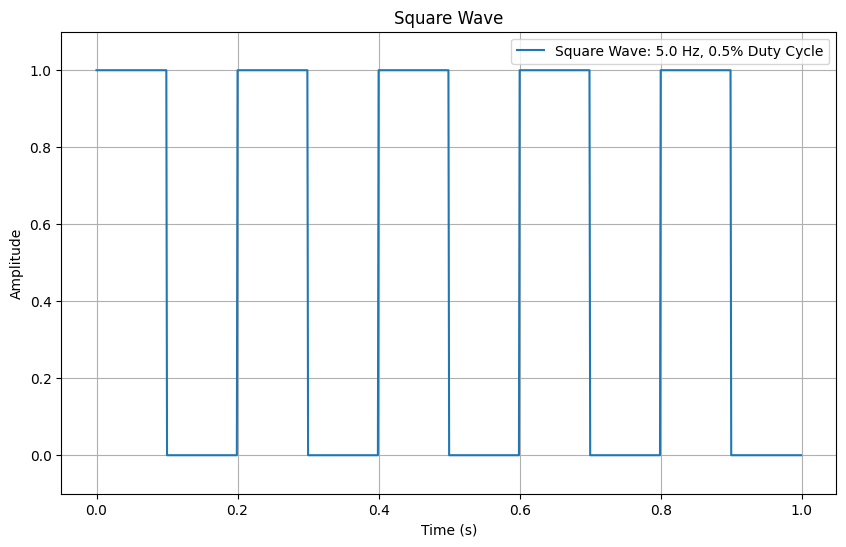

In [85]:
# Square wave parameters
frequency = 5.0  # in Hz
duty_cycle = 0.5  # 50% duty cycle
duration = 1.0   # in seconds
sampling_frequency = 1000  # in Hz

# Time array
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)

# Generate the square wave
square_wave = np.mod(t * frequency, 1) < duty_cycle

# Plot the square wave
plt.figure(figsize=(10, 6))
plt.plot(t, square_wave, label=f'Square Wave: {frequency} Hz, {duty_cycle}% Duty Cycle')
plt.title('Square Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.1)  # Adjust y-axis limits for better visualization
plt.legend()
plt.grid(True)
plt.show()

9.

C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\2010231462.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, unit_step, use_line_collection=True)
C:\Users\John Justine\AppData\Local\Temp\ipykernel_120348\2010231462.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, impulse, use_line_collection=True)


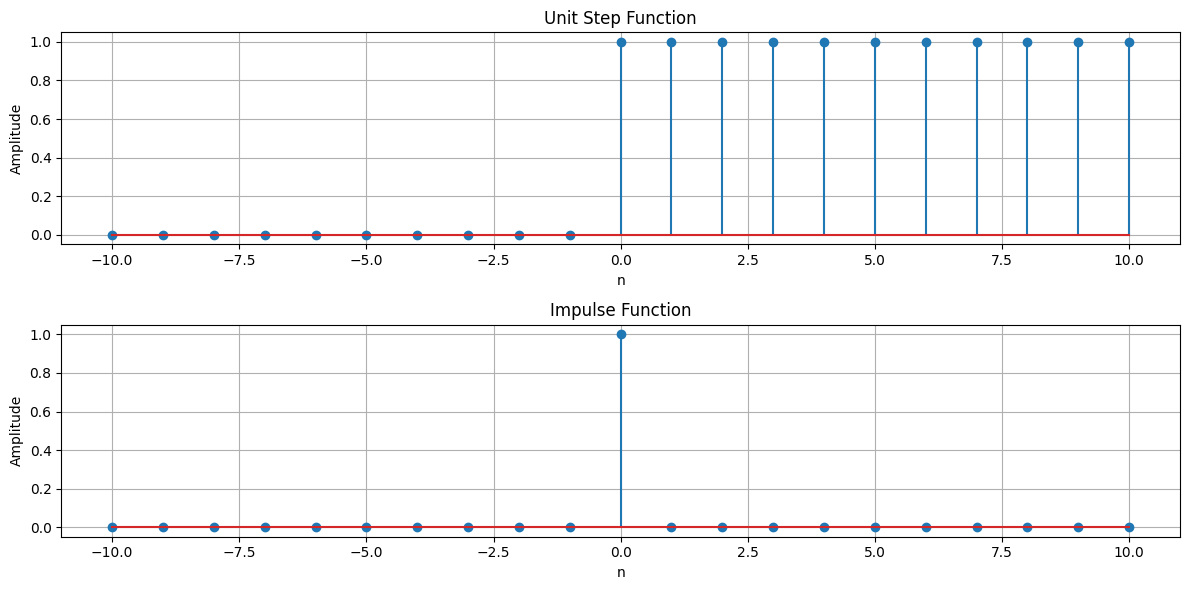

In [86]:
# Generate a unit step function
n = np.arange(-10, 11)  # Define the range of values for the discrete signal
unit_step = np.heaviside(n, 1)

# Generate an impulse function
impulse = np.zeros(len(n))
impulse[len(n)//2] = 1  # Place the impulse in the middle of the signal

# Plot the discrete-time signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(n, unit_step, use_line_collection=True)
plt.title('Unit Step Function')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, impulse, use_line_collection=True)
plt.title('Impulse Function')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\John Justine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:591: RuntimeWarning: divide by zero encountered in divide
  h = k * polyvalfromroots(zm1, z) / polyvalfromroots(zm1, p)
C:\Users\John Justine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:591: RuntimeWarning: invalid value encountered in divide
  h = k * polyvalfromroots(zm1, z) / polyvalfromroots(zm1, p)


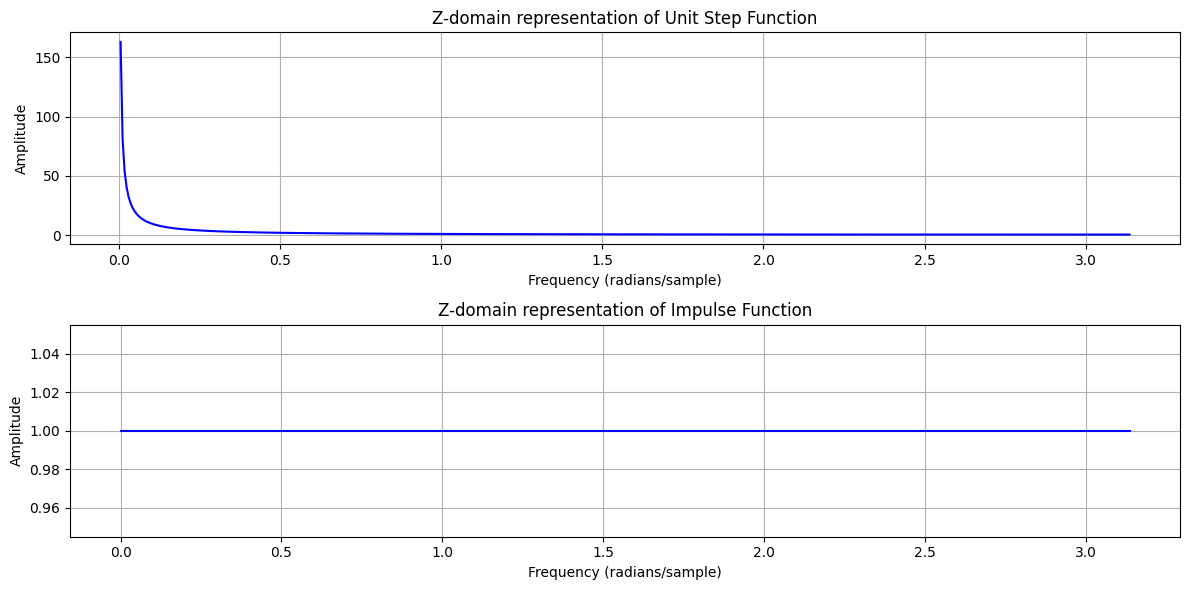

In [88]:

# Define the discrete-time signal (e.g., a unit step or impulse)
n = np.arange(-10, 11)  # Define the range of values for the discrete signal
unit_step = np.heaviside(n, 1)  # Unit step function
impulse = np.zeros(len(n))
impulse[len(n)//2] = 1  # Impulse function

# Compute the Z-transform
z_unit_step = signal.TransferFunction([1, 0], [1, -1], dt=1.0)  # Z-transform of the unit step function
z_impulse = signal.TransferFunction([1], [1], dt=1.0)  # Z-transform of the impulse function

# Plot the Z-domain representation
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
w, h = signal.freqz_zpk(z_unit_step.zeros, z_unit_step.poles, z_unit_step.dt)
plt.plot(w, abs(h), 'b')
plt.title('Z-domain representation of Unit Step Function')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
w, h = signal.freqz_zpk(z_impulse.zeros, z_impulse.poles, z_impulse.dt)
plt.plot(w, abs(h), 'b')
plt.title('Z-domain representation of Impulse Function')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

 In the context of signal processing and control systems, the poles and zeros of the Z-transform play a crucial role in understanding the behavior and characteristics of discrete-time systems. Here's a brief discussion on poles and zeros in the Z-transform:

1. **Poles**:
   - Poles of the Z-transform are the values of 'z' for which the denominator of the transfer function becomes zero.
   - Poles determine the stability and frequency response of the system. The system is considered stable if all poles lie inside the unit circle in the Z-plane.
   - The poles can provide insights into the decay rate of the system response and the oscillatory behavior in the frequency domain.
   - Complex conjugate poles lead to resonant behavior, while real poles affect the transient response of the system.

2. **Zeros**:
   - Zeros of the Z-transform are the values of 'z' for which the numerator of the transfer function becomes zero.
   - Zeros indicate the points in the Z-plane where the transfer function has no effect on the output.
   - Zeros can affect the system's frequency response by introducing notches or peaks at specific frequencies.
   - The distance of zeros from the poles influences the system's frequency response and transient behavior.

3. **Relationship between Poles and Zeros**:
   - The relative positions of poles and zeros in the Z-plane determine the system's characteristics such as stability, response time, and frequency response.
   - Zeros can cancel out the effect of poles, leading to improved system performance or compensation for undesired characteristics.
   - The interplay between poles and zeros influences the overall system response and design considerations in signal processing and control systems.

Understanding the distribution of poles and zeros in the Z-plane provides valuable insights into system behavior, stability, and performance. System analysis and design often involve manipulating the positions of poles and zeros to achieve desired responses and meet specific criteria.  